<a href="https://colab.research.google.com/github/KolbeCer/A.I./blob/master/HW_2/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Import tensorflow and keras
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Import tensorflow datasets
import tensorflow_datasets as tfds


TensorFlow 2.x selected.


# Problem 1

######Functions
f1: z = x$^2$ + y$^2$\
f2: z = -x$^2$ - y$^2$\
f3: z = x$^2$ - y$^2$

p1: (0, 0, 0)\
p2: (0, 0, 0)\
p3: (0, 0, 0)

In [0]:
def f1(x, y):
    return (x ** 2 + y ** 2)
def f2(x, y):
    return (- x ** 2 - y ** 2)
def f3(x, y):
    return ((x ** 2 - y ** 2))

In [0]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)
Z3 = f3(X, Y)

#####Function 1

###### 3D

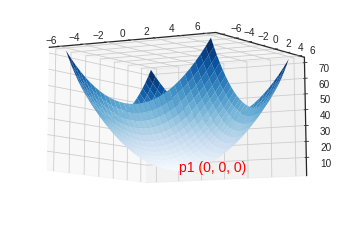

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,
                cmap='Blues', edgecolor='none')
ax.text(0, 0, 0,'p1 (0, 0, 0)', fontsize=14, color='red')
ax.view_init(-10)

###### Density

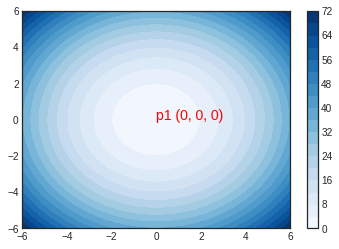

In [0]:
plt.contourf(X, Y, Z1, 20, cmap='Blues')
plt.colorbar();
plt.text(0, 0, 'p1 (0, 0, 0)', fontsize=14, color='red');

###### Contour

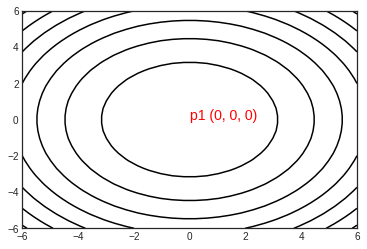

In [148]:
plt.contour(X, Y, Z1, colors='black');
plt.text(0, 0, 'p1 (0, 0, 0)', fontsize=14, color='red');

#####Function 2

###### 3D

Text(0, 0, 'p2 (0, 0, 0)')

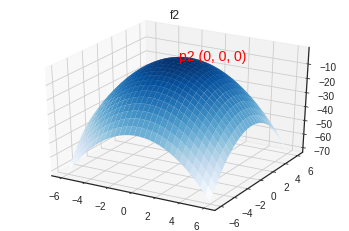

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,
                cmap='Blues', edgecolor='none')
ax.set_title('f2');
ax.text(0, 0, 0,'p2 (0, 0, 0)', fontsize=14, color='red')

###### Density

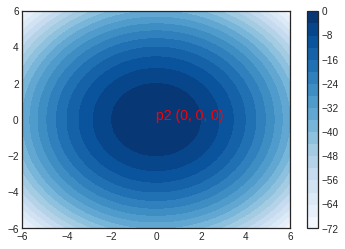

In [0]:
plt.contourf(X, Y, Z2, 20, cmap='Blues')
plt.colorbar();
plt.text(0, 0, 'p2 (0, 0, 0)', fontsize=14, color='red');

###### Contour

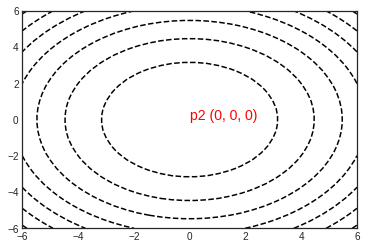

In [0]:
plt.contour(X, Y, Z2, colors='black');
plt.text(0, 0, 'p2 (0, 0, 0)', fontsize=14, color='red');

#####Function 3

###### 3D

Text(0, 0, 'p3 (0, 0, 0)')

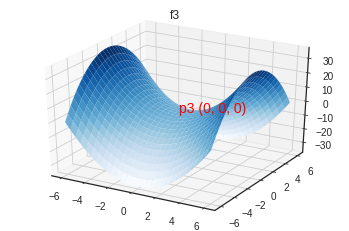

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z3, rstride=1, cstride=1,
                cmap='Blues', edgecolor='none')
ax.set_title('f3');
ax.text(0, 0, 0,'p3 (0, 0, 0)', fontsize=14, color='red')

###### Density

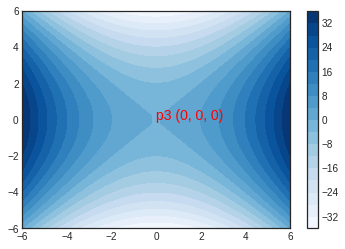

In [0]:
plt.contourf(X, Y, Z3, 20, cmap='Blues')
plt.colorbar();
plt.text(0, 0, 'p3 (0, 0, 0)', fontsize=14, color='red');

###### Contour

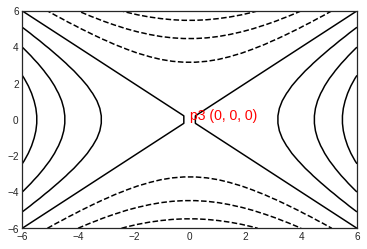

In [0]:
plt.contour(X, Y, Z3, colors='black');
plt.text(0, 0, 'p3 (0, 0, 0)', fontsize=14, color='red');

# Problem2

##Generate random data

In [0]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)

m = 100
X1 = 3 * np.random.rand(m, 1)
X2 = 7 * np.random.rand(m, 1)
y = 4 + 3 * X1 + 4 * X2 + np.random.rand(m, 1)

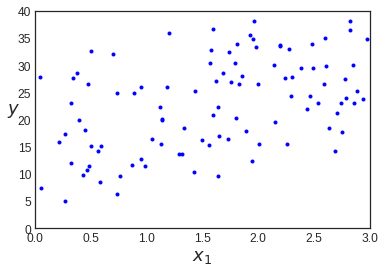

In [229]:
# plot graph showing x1 versus y
plt.plot(X1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,3, 0, 40])
plt.show()

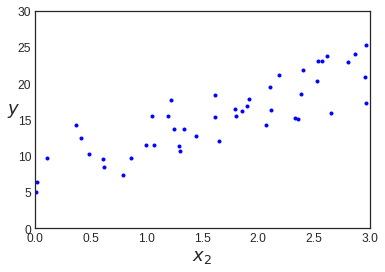

In [230]:
# plot graph showing x2 versus y
plt.plot(X2, y, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 30])
plt.show()

##combine bias and weights

In [0]:
# vectorize the x's
X_b = np.column_stack([np.ones((m, 1)), X1, X2])

In [210]:
print(X_b.shape)

(100, 3)


In [211]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.16811227 0.52721475]
 [1.         0.46971889 0.99540699]
 [1.         0.57352042 0.62872313]
 [1.         1.87330926 1.27123534]
 [1.         0.5328786  1.21789982]]


##Linear regression using mini-batch gradient descent

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

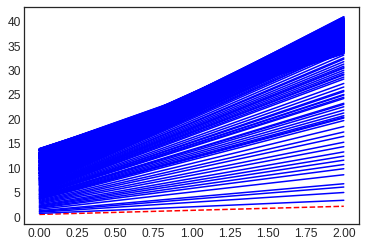

In [237]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

# initialize the array for the n = 2 case
X_b_new = np.column_stack([np.ones((2,1)), np.array(([0],[2])), np.array(([0],[3]))])
y_predict = X_b_new.dot(weight)
# plot initial gradient
plt.plot(np.array(([0],[2])), y_predict, "r--")

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
        # plot each consecutive mini-batch gradient descent
        y_predict = X_b_new.dot(weight)
        plt.plot(np.array(([0],[2])), y_predict, "b-")

In [0]:
weight_path_mgd[-1]

In [0]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

#Problem 3

In [0]:
# Construct a tf.data.Dataset
dataset = tf.keras.datasets.mnist
train_data, test_data = dataset.load_data()

train_images_original, train_labels_original = train_data

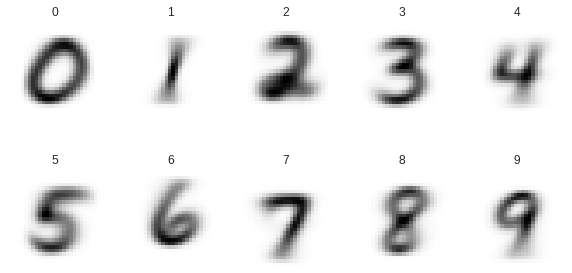

In [188]:
plt.figure(figsize=(10,5))
for i in range(10):
    mean = np.average(train_images_original[train_labels_original==i],0)
    plt.subplot(2, 5, i+1)
    plt.imshow(mean.reshape((28,28))) 
    plt.axis('off')
    plt.title(i)